In [8]:
import pandas as pd
import numpy as np
import sqlite3
import pymysql

In [9]:
import pandas as pd
import pymysql

# Establish connection
conn = pymysql.connect(
    host='localhost', 
    user='root', 
    password='Shelby$1', 
    database='debt_collection'
)

# Load data into Pandas DataFrame
df = pd.read_sql("SELECT * FROM debtors", conn)

# Display first 5 rows
df.head()


C:\Users\Touseef Haider\AppData\Local\Temp\ipykernel_3712\2207956222.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM debtors", conn)


,debtor_id,name,total_debt,total_paid,phone,city
0,1,Debtor_1,29101.0,12022,+16504567148,New York
1,2,Debtor_2,33768.0,26316,+11693428021,Chicago
2,3,Debtor_3,34220.0,17972,+14494864176,New York
3,4,Debtor_4,6366.0,11776,+12416264650,Chicago
4,5,Debtor_5,15664.0,3803,+14031216155,New York


In [10]:
df.info() #check column types & missing values
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   debtor_id   500 non-null    int64  
 1   name        500 non-null    object 
 2   total_debt  500 non-null    float64
 3   total_paid  500 non-null    int64  
 4   phone       500 non-null    object 
 5   city        500 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 23.6+ KB


,debtor_id,total_debt,total_paid
count,500.000000,500.000000,500.000000
mean,250.500000,25431.514000,16089.152000
std,144.481833,14277.124625,8485.015653
min,1.000000,1077.000000,136.000000
25%,125.750000,12427.750000,8834.500000
50%,250.500000,25085.500000,16153.500000
75%,375.250000,37809.500000,23313.250000
max,500.000000,49889.000000,29935.000000


In [11]:
df.isnull().sum()  # Count missing values
df.duplicated().sum()  # Check for duplicate rows


np.int64(0)

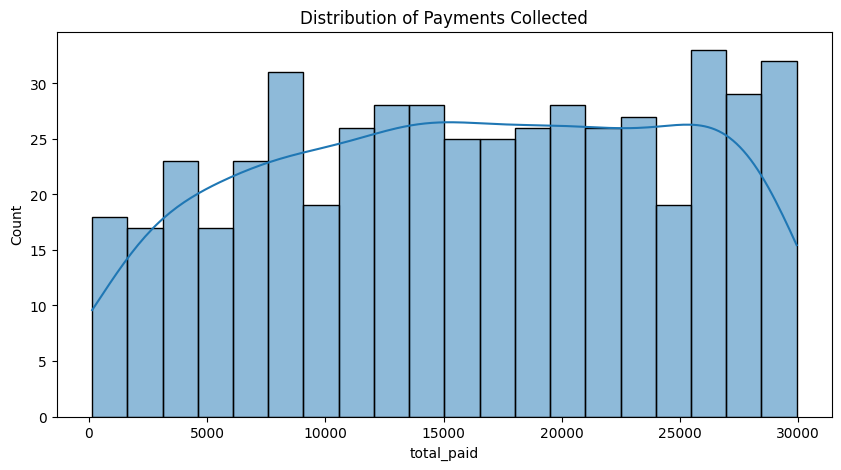

In [12]:
import pandas as pd
import numpy as np
import sqlite3
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['total_paid'], bins=20, kde=True)
plt.title("Distribution of Payments Collected")
plt.show()


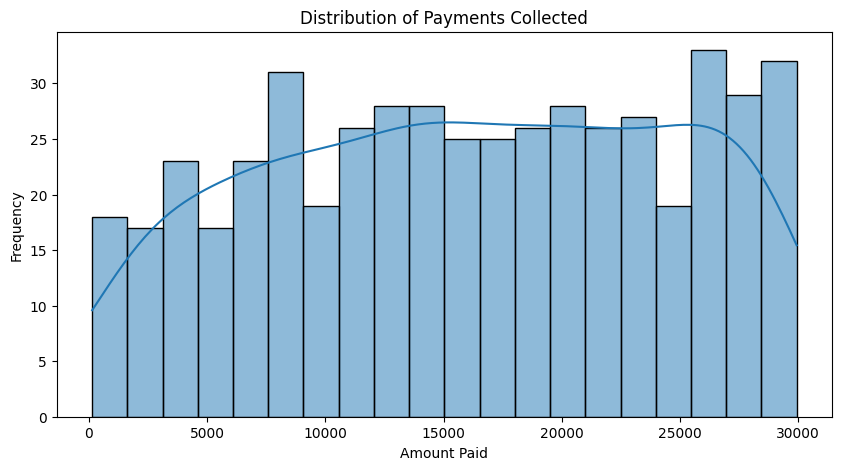

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df['total_paid'], bins=20, kde=True)
plt.title("Distribution of Payments Collected")
plt.xlabel("Amount Paid")
plt.ylabel("Frequency")
plt.show()


payment_range
20K+       37.4
10K-20K    34.0
5K-10K     15.6
0-5K       13.0
Name: proportion, dtype: float64


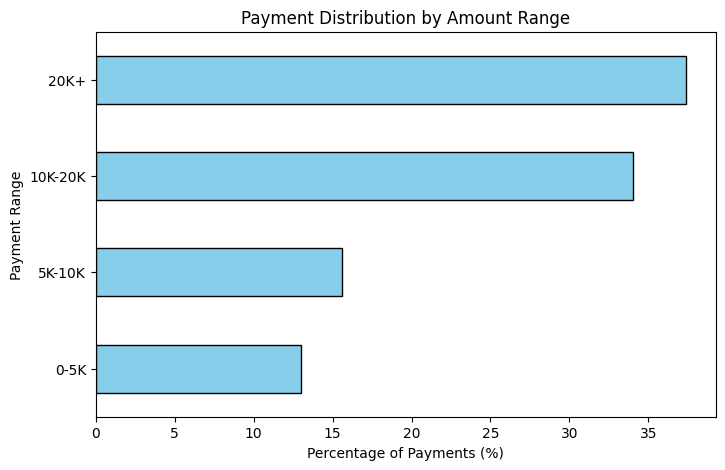

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Define bins and labels
bins = [0, 5000, 10000, 20000, float('inf')]
labels = ['0-5K', '5K-10K', '10K-20K', '20K+']

# Categorize payments
df['payment_range'] = pd.cut(df['total_paid'], bins=bins, labels=labels, right=True)

# Calculate percentage
payment_distribution = df['payment_range'].value_counts(normalize=True) * 100

# Display results
print(payment_distribution)

# Plot the distribution
plt.figure(figsize=(8,5))
payment_distribution.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel("Percentage of Payments (%)")
plt.ylabel("Payment Range")
plt.title("Payment Distribution by Amount Range")
plt.show()
